In [22]:
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

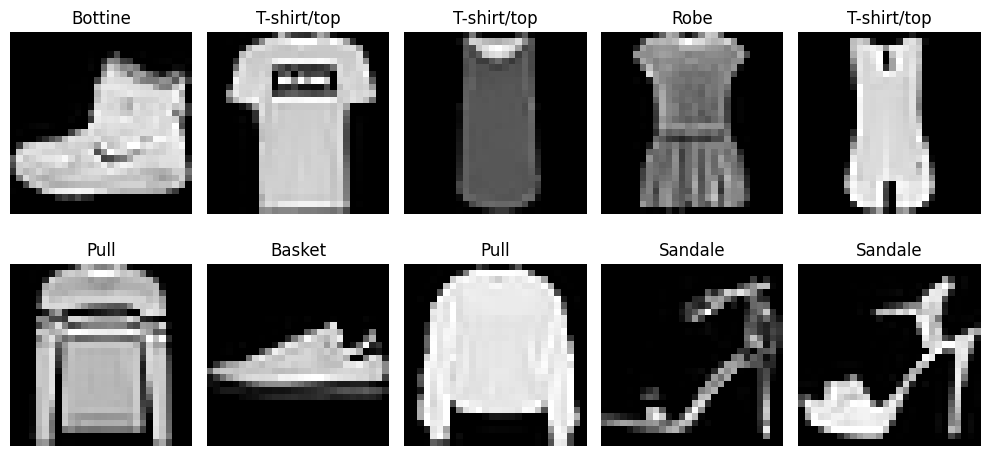

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Définir les noms des classes
class_names = ["T-shirt/top", "Pantalon", "Pull", "Robe", "Manteau",
               "Sandale", "Chemise", "Basket", "Sac", "Bottine"]

# Afficher les 10 premières images avec leur nom de classe
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(trainX[i], cmap='gray')
    plt.title(class_names[trainy[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()



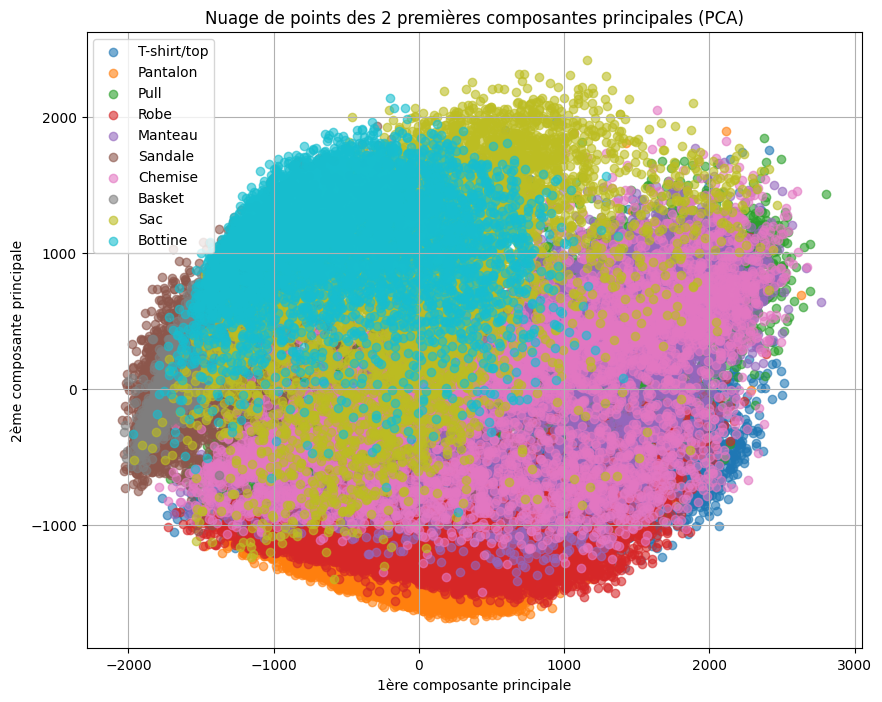

In [3]:
# Aplatir chaque image en un vecteur de taille 784
trainX_flattened = trainX.reshape(trainX.shape[0], -1)
# Réduction de la dimension avec PCA (2 composantes principales)
pca = PCA(n_components=2)
trainX_pca = pca.fit_transform(trainX_flattened)
# Couleurs pour chaque classe
colors = plt.cm.tab10(np.arange(10))
# Représenter chaque classe dans le nuage de points
plt.figure(figsize=(10, 8))
for class_id in range(10):
    idx = trainy == class_id
    plt.scatter(trainX_pca[idx, 0], trainX_pca[idx, 1],
                label=class_names[class_id], alpha=0.6, color=colors[class_id])

plt.title("Nuage de points des 2 premières composantes principales (PCA)")
plt.xlabel("1ère composante principale")
plt.ylabel("2ème composante principale")
plt.legend(loc='best')
plt.grid(True)
plt.show()

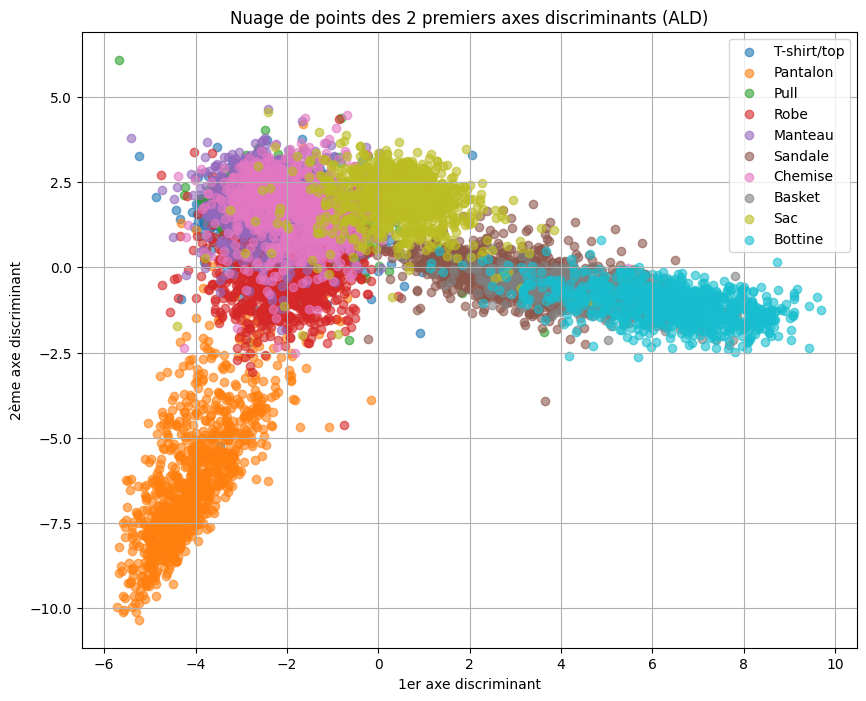

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Réduire la taille du jeu de données pour accélérer les calculs
sample_size = 10000  
trainX = trainX[:sample_size]
trainy = trainy[:sample_size]

# Aplatir chaque image en un vecteur de taille 784
trainX_flattened = trainX.reshape(trainX.shape[0], -1)

# Réduire les dimensions avec PCA (à 50 composantes pour stabiliser LDA)
pca = PCA(n_components=50)
trainX_reduced = pca.fit_transform(trainX_flattened)

# Réduction de la dimension avec ALD (2 axes discriminants)
lda = LDA(n_components=2)
trainX_lda = lda.fit_transform(trainX_reduced, trainy)

# Couleurs pour chaque classe
colors = plt.cm.tab10(np.arange(10))

# Représenter chaque classe dans le nuage de points
plt.figure(figsize=(10, 8))
for class_id in range(10):
    idx = trainy == class_id
    plt.scatter(trainX_lda[idx, 0], trainX_lda[idx, 1],
                label=class_names[class_id], alpha=0.6, color=colors[class_id])

plt.title("Nuage de points des 2 premiers axes discriminants (ALD)")
plt.xlabel("1er axe discriminant")
plt.ylabel("2ème axe discriminant")
plt.legend(loc='best')
plt.grid(True)
plt.show()

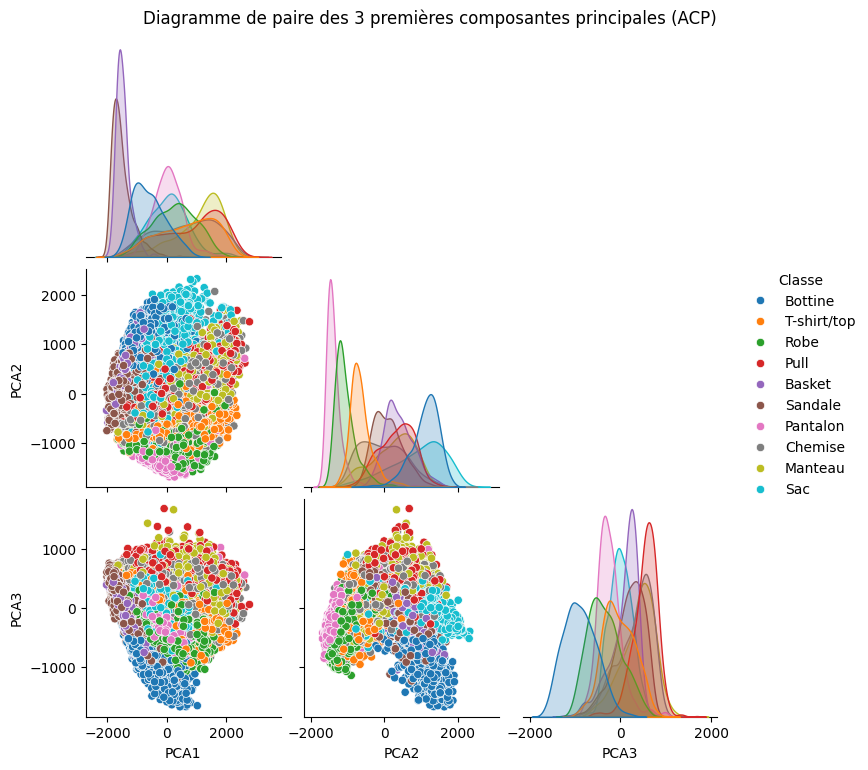

In [5]:
import pandas as pd
import seaborn as sns
# Réduction de la dimension avec PCA (3 composantes principales)
pca = PCA(n_components=3)
trainX_pca = pca.fit_transform(trainX_flattened)
# Conversion en DataFrame pour faciliter l'utilisation avec seaborn
df = pd.DataFrame(data=trainX_pca, columns=["PCA1", "PCA2", "PCA3"])
df["Classe"] = trainy  # Ajout des étiquettes de classe
df["Classe"] = df["Classe"].map(lambda x: class_names[x])

# Création du pairplot avec seaborn
sns.pairplot(df, vars=["PCA1", "PCA2", "PCA3"], hue="Classe", palette="tab10", corner=True)
plt.suptitle("Diagramme de paire des 3 premières composantes principales (ACP)", y=1.02)
plt.show()

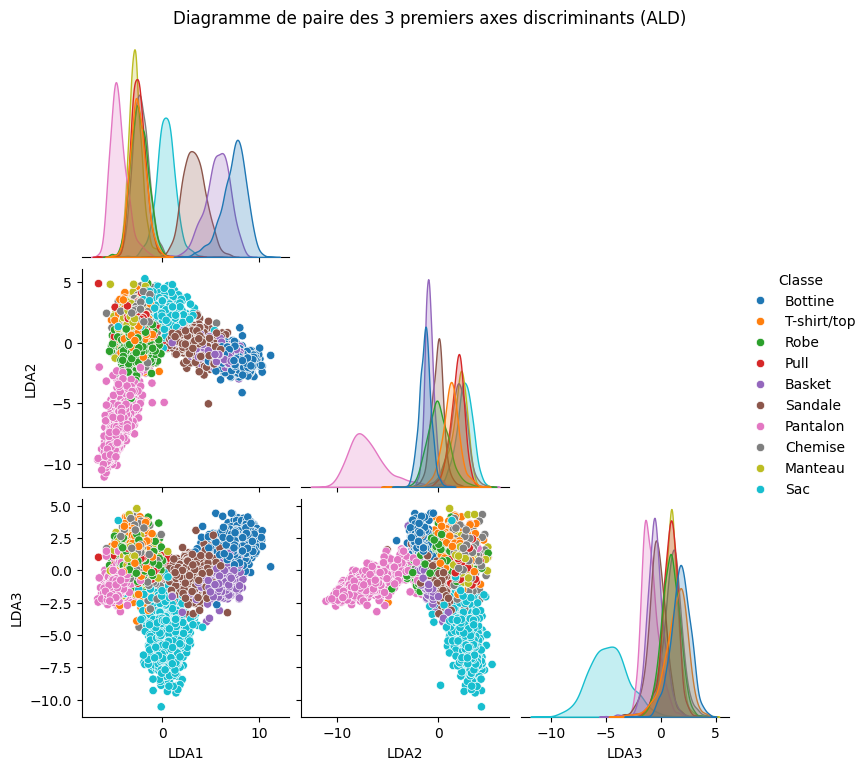

In [6]:
# Réduction de la dimension avec ALD (3 axes discriminants)
lda = LDA(n_components=3)
trainX_lda = lda.fit_transform(trainX_flattened, trainy)

# Conversion en DataFrame pour faciliter l'utilisation avec seaborn
df = pd.DataFrame(data=trainX_lda, columns=["LDA1", "LDA2", "LDA3"])
df["Classe"] = trainy  # Ajout des étiquettes de classe
df["Classe"] = df["Classe"].map(lambda x: class_names[x])

# Création du pairplot avec seaborn
sns.pairplot(df, vars=["LDA1", "LDA2", "LDA3"], hue="Classe", palette="tab10", corner=True)
plt.suptitle("Diagramme de paire des 3 premiers axes discriminants (ALD)", y=1.02)
plt.show()

In [7]:
print("Trainy raw shape:", trainy.shape)  
print("Testy raw shape:", testy.shape)   
print("Trainy before encoding:", trainy[:10])  

Trainy raw shape: (10000,)
Testy raw shape: (10000,)
Trainy before encoding: [9 0 0 3 0 2 7 2 5 5]


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
# Normalisation des données (valeurs entre 0 et 1)
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0
trainX = trainX.reshape(trainX.shape[0], -1)
testX = testX.reshape(testX.shape[0], -1)
print("TrainX shape:", trainX.shape)  
print("TestX shape:", testX.shape)    
# Encodage one-hot des étiquettes
trainy = to_categorical(trainy, num_classes=10)
testy = to_categorical(testy, num_classes=10)
print("Train labels shape:", trainy.shape)  
print("Test labels shape:", testy.shape)    
# Réduire l'ensemble d'entraînement à 10,000 échantillons
trainX = trainX[:10000]
trainy = trainy[:10000]
# Définir le modèle dense avec Dropout uniquement
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),  # 1ère couche cachée
    Dropout(0.4),  # Dropout après la 1ère couche
    Dense(32, activation='relu'),  # 2ème couche cachée
    Dropout(0.4),  # Dropout après la 2ème couche
    Dense(10, activation='softmax')  # Couche de sortie pour la classification
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(trainX, trainy,validation_split=0.2,epochs=50,batch_size=32,verbose=2)

# Évaluer le modèle sur les données de test
test_loss, test_accuracy = model.evaluate(testX, testy, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

TrainX shape: (10000, 784)
TestX shape: (10000, 784)
Train labels shape: (10000, 10)
Test labels shape: (10000, 10)


/usr/local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-27 19:58:42.501224: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/50
250/250 - 4s - 17ms/step - accuracy: 0.4762 - loss: 1.4195 - val_accuracy: 0.6830 - val_loss: 0.8042
Epoch 2/50
250/250 - 1s - 5ms/step - accuracy: 0.6572 - loss: 0.9168 - val_accuracy: 0.7355 - val_loss: 0.6731
Epoch 3/50
250/250 - 2s - 7ms/step - accuracy: 0.7056 - loss: 0.7861 - val_accuracy: 0.7695 - val_loss: 0.5911
Epoch 4/50
250/250 - 1s - 6ms/step - accuracy: 0.7406 - loss: 0.7228 - val_accuracy: 0.7785 - val_loss: 0.5955
Epoch 5/50
250/250 - 2s - 7ms/step - accuracy: 0.7539 - loss: 0.6709 - val_accuracy: 0.8010 - val_loss: 0.5318
Epoch 6/50
250/250 - 1s - 5ms/step - accuracy: 0.7779 - loss: 0.6250 - val_accuracy: 0.8030 - val_loss: 0.5317
Epoch 7/50
250/250 - 1s - 6ms/step - accuracy: 0.7788 - loss: 0.6141 - val_accuracy: 0.8035 - val_loss: 0.5076
Epoch 8/50
250/250 - 1s - 5ms/step - accuracy: 0.7933 - loss: 0.5879 - val_accuracy: 0.8290 - val_loss: 0.4893
Epoch 9/50
250/250 - 2s - 6ms/step - accuracy: 0.7985 - loss: 0.5599 - val_accuracy: 0.8300 - val_loss: 0.4761


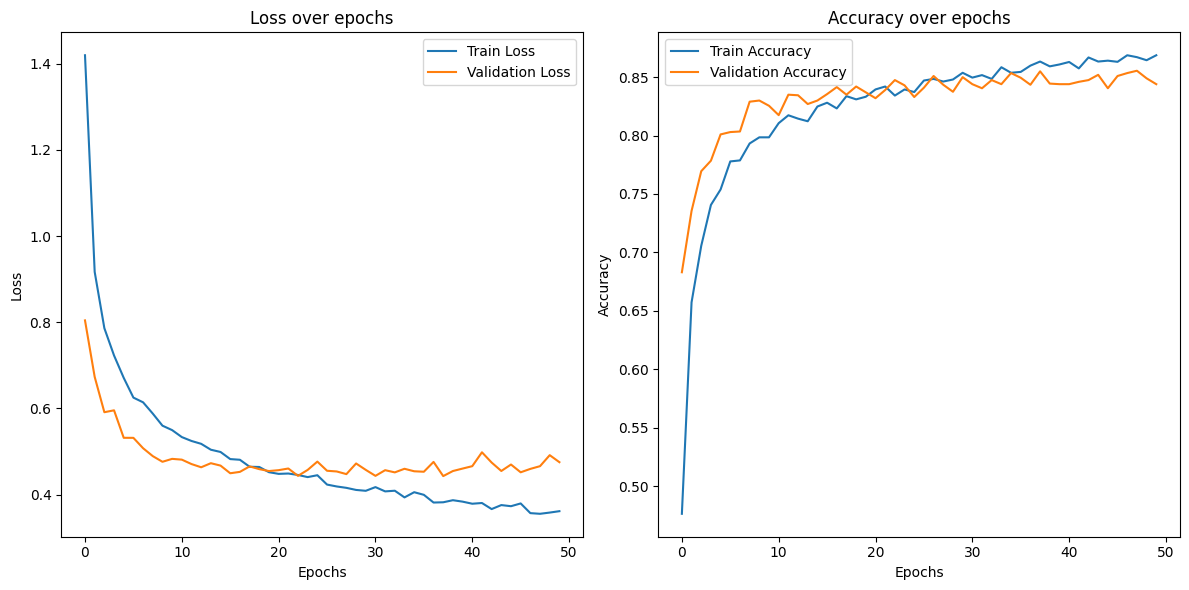

In [10]:
import matplotlib.pyplot as plt

# Extraire les valeurs de loss et accuracy depuis l'objet 'history'
history_dict = history.history
loss_values = history_dict['loss']
accuracy_values = history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_accuracy_values = history_dict['val_accuracy']

# Tracer la courbe de la loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, premier graphique
plt.plot(loss_values, label='Train Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Tracer la courbe de l'accuracy
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, deuxième graphique
plt.plot(accuracy_values, label='Train Accuracy')
plt.plot(val_accuracy_values, label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()

In [11]:
print(f"Shape of testX: {testX.shape}")
print(f"Shape of testy: {testy.shape}")

Shape of testX: (10000, 784)
Shape of testy: (10000, 10)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Shape of predictions: (10000, 10)


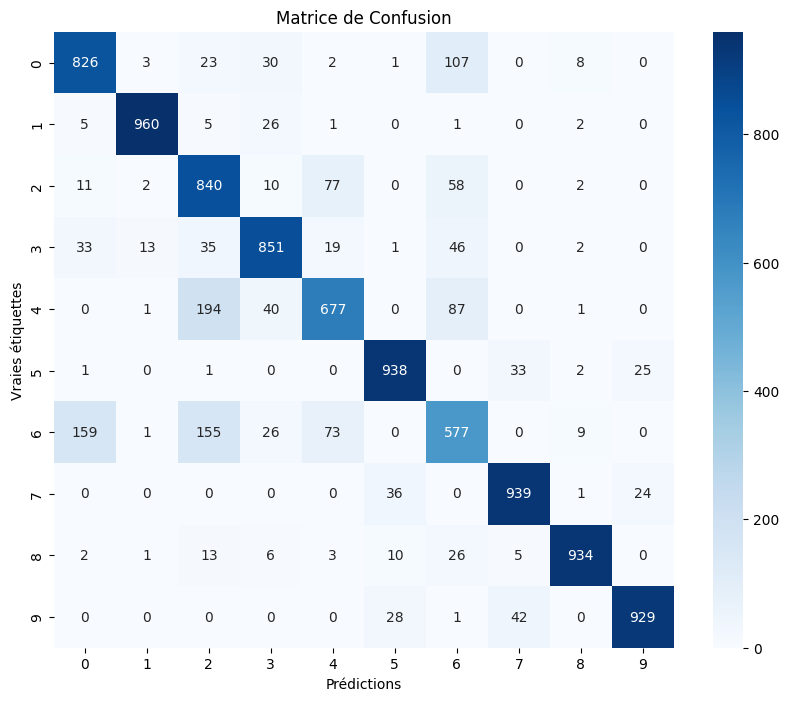

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Effectuer les prédictions sur l'ensemble de test
predictions = model.predict(testX)
# Vérifier la taille des prédictions
print(f"Shape of predictions: {predictions.shape}")  # Devrait afficher (10000, 10) si vous avez 10 classes

# Si les labels sont sous forme one-hot (par exemple pour les données catégorielles)
# Nous devons convertir les prédictions et les étiquettes réelles en indices (classes)
predicted_classes = np.argmax(predictions, axis=1)  # Classes prédites
true_classes = np.argmax(testy, axis=1)  # Classes réelles

# Calcul de la matrice de confusion
cm = confusion_matrix(true_classes, predicted_classes)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

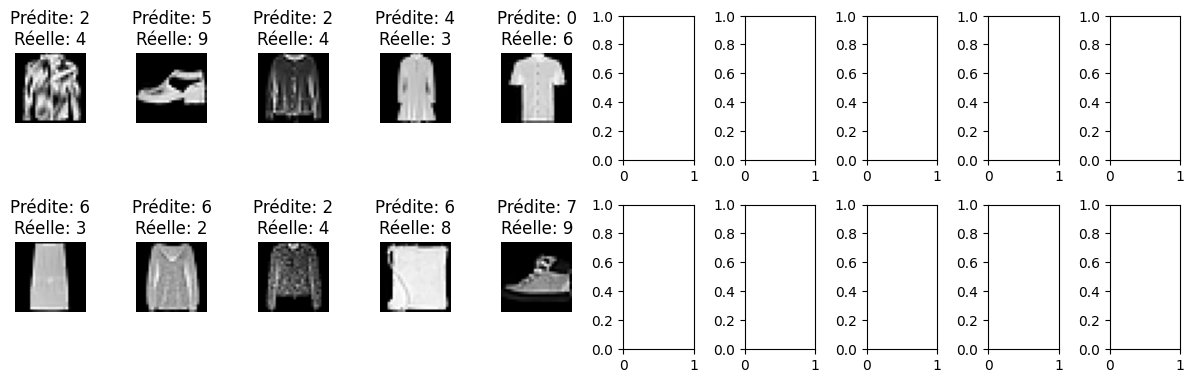

In [13]:
# Trouver les indices des mauvaises prédictions
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Afficher un sous-ensemble des images de mauvaise prédiction
fig, axes = plt.subplots(nrows=2, ncols=min(10, len(incorrect_indices)), figsize=(12, 4))
for i, idx in enumerate(incorrect_indices[:min(10, len(incorrect_indices))]):
    ax = axes[i // 5, i % 5]  # Organiser dans une grille 2x5
    ax.imshow(testX[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"Prédite: {predicted_classes[idx]}\nRéelle: {true_classes[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Créer le modèle CNN inspiré de LeNet-5
model = Sequential()

# C1 : Première couche convolutive
model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1), padding='same'))  # 6 filtres de taille 5x5
model.add(MaxPooling2D(pool_size=(2, 2)))  # S2 : MaxPooling (2x2)

# C3 : Deuxième couche convolutive
model.add(Conv2D(16, (5, 5), activation='relu', padding='valid'))  # 16 filtres de taille 5x5
model.add(MaxPooling2D(pool_size=(2, 2)))  # S4 : MaxPooling (2x2)

# C5 : Couche entièrement connectée après aplatissement
model.add(Flatten())  # Aplatir la sortie de la dernière couche convolutive

# Fully connected layers
model.add(Dense(120, activation='relu'))  # 120 neurones
model.add(Dropout(0.5))  # Dropout pour éviter le sur-apprentissage

# Couche de sortie (10 classes)
model.add(Dense(10, activation='softmax'))  # 10 neurones pour 10 classes

# Compilation du modèle
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,902 (202.74 KB)

 Trainable params: 51,902 (202.74 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Reshape des données pour correspondre à l'entrée du modèle (28x28x1)
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
print(testX.shape)

(10000, 28, 28, 1)


In [26]:
# Reshape des données pour correspondre à l'entrée du modèle (28x28x1)
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# Convertir les labels en format one-hot
trainy = to_categorical(trainy, 10)
testy = to_categorical(testy, 10)

# Entraîner le modèle
history = model.fit(trainX, trainy, epochs=10, batch_size=32, validation_data=(testX, testy))

# Évaluer le modèle
test_loss, test_accuracy = model.evaluate(testX, testy, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.6108 - loss: 2.7581 - val_accuracy: 0.8045 - val_loss: 0.5285
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8052 - loss: 0.5310 - val_accuracy: 0.8370 - val_loss: 0.4398
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8329 - loss: 0.4593 - val_accuracy: 0.8501 - val_loss: 0.4002
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.8464 - loss: 0.4201 - val_accuracy: 0.8632 - val_loss: 0.3784
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8594 - loss: 0.3852 - val_accuracy: 0.8635 - val_loss: 0.3687
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.8599 - loss: 0.3795 - val_accuracy: 0.8730 - val_loss: 0.3477
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8677 - loss: 0.3602 - val_accuracy: 0.8719 - val_loss: 0.3458
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8684 -

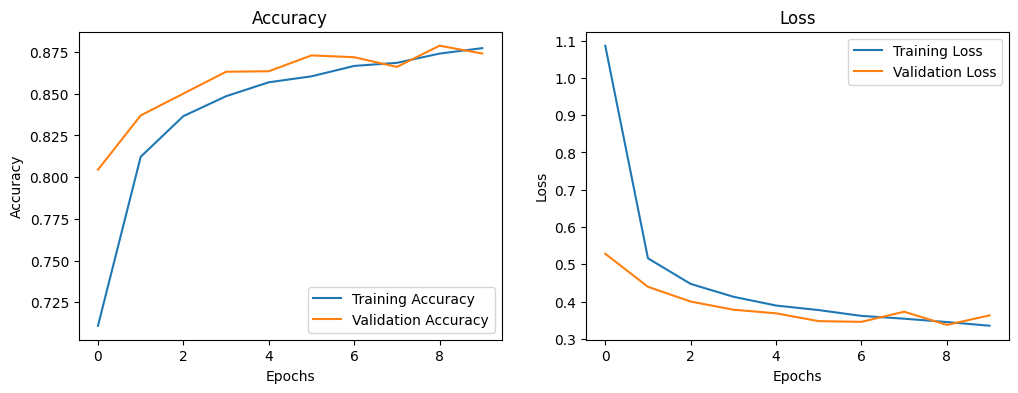

In [27]:
# Courbes d'accuracy et de loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


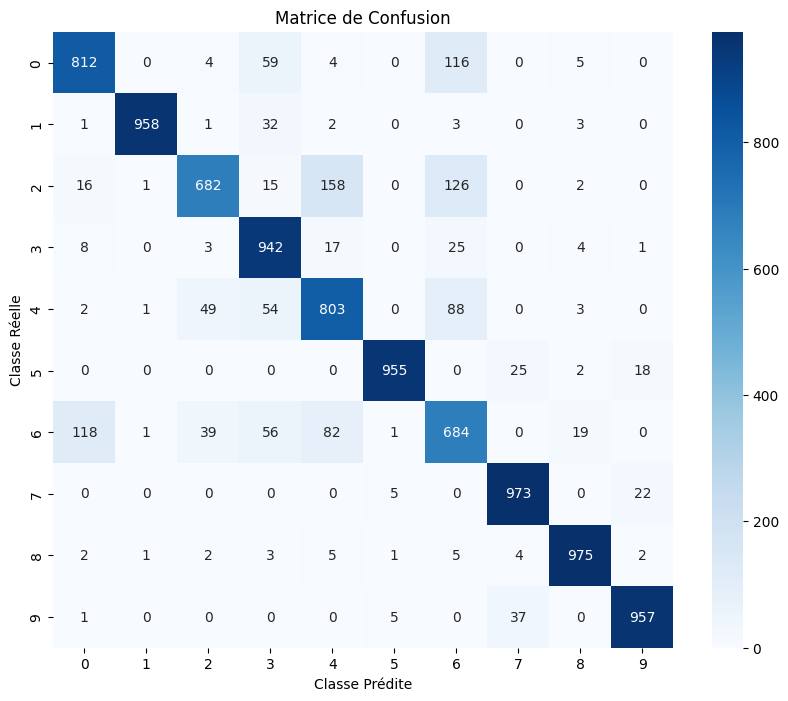

In [28]:
# Si vos étiquettes de test sont en one-hot encoding, convertissez-les en entiers
y_test_classes = np.argmax(testy, axis=1)  # Convertir testy (one-hot) en classes

# Prédictions sur l'ensemble de test
y_pred = model.predict(testX)  # testX est votre ensemble de test
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir les prédictions en classes

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Affichage de la matrice de confusion sous forme de carte thermique
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title('Matrice de Confusion')
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.show()

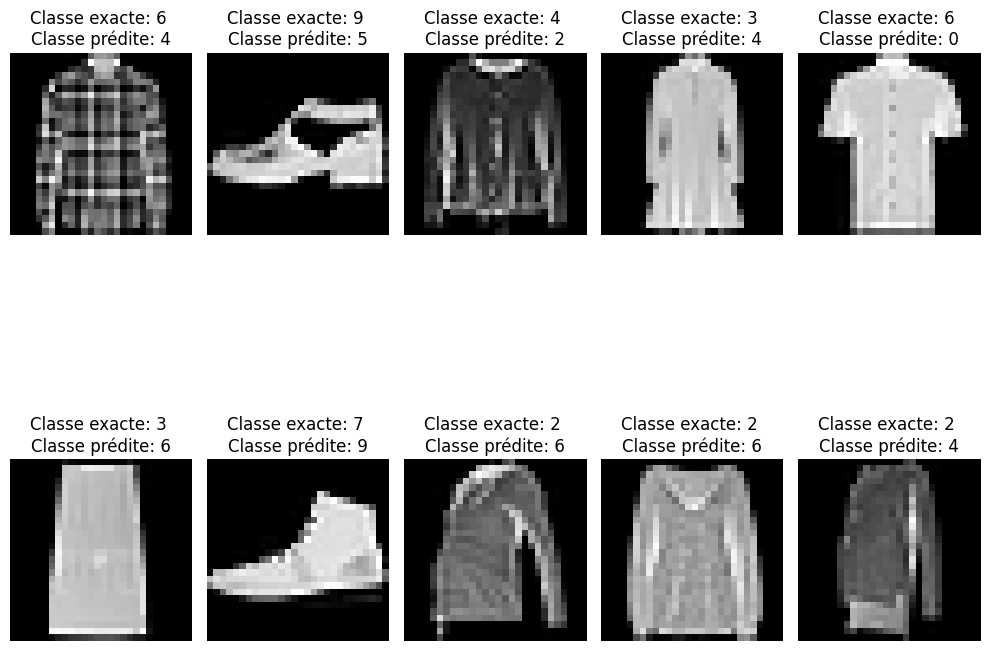

In [29]:
# Trouver les indices des mauvaises prédictions
misclassified_indexes = np.where(y_pred_classes != y_test_classes)[0]

# Afficher les premières mauvaises prédictions (maximum 10 images)
num_to_display = min(10, len(misclassified_indexes))

plt.figure(figsize=(10, 10))
for i in range(num_to_display):
    idx = misclassified_indexes[i]
    
    # Affichage de l'image mal classée
    plt.subplot(2, 5, i + 1)
    plt.imshow(testX[idx].reshape(28, 28), cmap='gray')  # Redimensionner l'image à 28x28
    plt.title(f"Classe exacte: {y_test_classes[idx]} \nClasse prédite: {y_pred_classes[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Conclusion : 
On constate que pour la classification d'images, le réseau CNN est une meilleure option car il atteint des accuracies élevées en moins d'epochs que le réseau Dense, est plus robuste aux erreurs et a une meilleure capacité de prédiction.